## Final Project Submission

Please fill out:
* Student name: Deanna Gould
* Student pace: flex
* Scheduled project review date/time:  Dec 23 10:00 AM PST
* Instructor name: Joe Comeaux
* Blog post URL:


In [1]:
'''
presentation: 

most will come from coefficients
fitted line for visualization
having residuals isn't required in presentation and might be too technical

Explain R-squared: how much our model explains changes in the price

R-squared would be how much an increase of one bedroom adds to the price of the house

'''

"\npresentation: \n\nmost will come from coefficients\nfitted line for visualization\nhaving residuals isn't required in presentation and might be too technical\n\nExplain R-squared: how much our model explains changes in the price\n\nR-squared would be how much an increase of one bedroom adds to the price of the house\n\n"

In [2]:
# Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

In [3]:
# Creating the DataFrame for the KC Housing Data

df = pd.read_csv('data/kc_house_data.csv', index_col=0)

In [4]:
# Looking at what the first few rows and columns of the housing data looks like

df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
id,,,,,,,,,,,,,,,,,,,,,
7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [5]:
# Checking the size of the DataFrame

df.shape

(30155, 24)

In [6]:
# Checking the datatypes in the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30155 entries, 7399300360 to 9557800100
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30155 non-null  object 
 1   price          30155 non-null  float64
 2   bedrooms       30155 non-null  int64  
 3   bathrooms      30155 non-null  float64
 4   sqft_living    30155 non-null  int64  
 5   sqft_lot       30155 non-null  int64  
 6   floors         30155 non-null  float64
 7   waterfront     30155 non-null  object 
 8   greenbelt      30155 non-null  object 
 9   nuisance       30155 non-null  object 
 10  view           30155 non-null  object 
 11  condition      30155 non-null  object 
 12  grade          30155 non-null  object 
 13  heat_source    30123 non-null  object 
 14  sewer_system   30141 non-null  object 
 15  sqft_above     30155 non-null  int64  
 16  sqft_basement  30155 non-null  int64  
 17  sqft_garage    30155 non-null  int64

In [9]:
# Checking which columns may contain null values

df.isna().any()

date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
greenbelt        False
nuisance         False
view             False
condition        False
grade            False
heat_source       True
sewer_system      True
sqft_above       False
sqft_basement    False
sqft_garage      False
sqft_patio       False
yr_built         False
yr_renovated     False
address          False
lat              False
long             False
dtype: bool

The heat_source and sewer_system columns have some null values, but I'm not sure how necessary that will be in my analysis.

In [10]:
# Getting a sum of the null values in each column

df.isna().sum()

date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [11]:
# Creating a copy of the DataFrame so I can compare to the original df I imported without restarting the notebook

kc = df.copy()

In [12]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30155 entries, 7399300360 to 9557800100
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30155 non-null  object 
 1   price          30155 non-null  float64
 2   bedrooms       30155 non-null  int64  
 3   bathrooms      30155 non-null  float64
 4   sqft_living    30155 non-null  int64  
 5   sqft_lot       30155 non-null  int64  
 6   floors         30155 non-null  float64
 7   waterfront     30155 non-null  object 
 8   greenbelt      30155 non-null  object 
 9   nuisance       30155 non-null  object 
 10  view           30155 non-null  object 
 11  condition      30155 non-null  object 
 12  grade          30155 non-null  object 
 13  heat_source    30123 non-null  object 
 14  sewer_system   30141 non-null  object 
 15  sqft_above     30155 non-null  int64  
 16  sqft_basement  30155 non-null  int64  
 17  sqft_garage    30155 non-null  int64

### Some Data Exploration

**Checking Distribution of Dataframe**

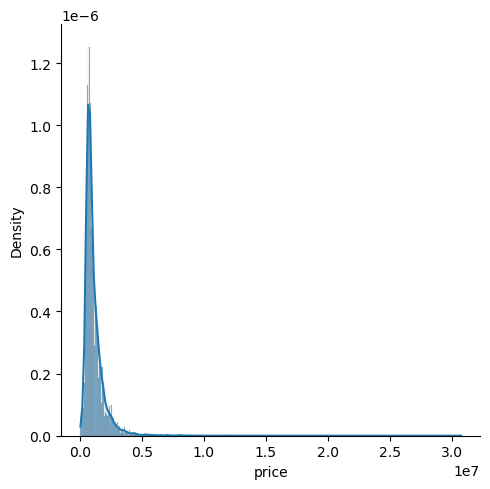

In [13]:
sns.displot(kc['price'], stat="density", kde=True)

It's clear that the distribution plot for price has a heavy right skew, so I'm going to use the 1.5 IQR rule to remove outliers.

In [14]:
'''
There's a really heavy skew but before I removed outliers, my R-squared was 0.371 and when I remove outliers it 
actually goes down
'''

"\nThere's a really heavy skew but before I removed outliers, my R-squared was 0.371 and when I remove outliers it \nactually goes down\n"

In [15]:
# Creating variables for q1 and q3 and creating a variable for IQR

q1 = kc['price'].quantile(0.25)
q3 = kc['price'].quantile(0.75)
IQR = q3-q1
print(IQR)

652000.0


In [16]:
# Creating variables for upper bound and lower bound, which will be the parameters for what I end up excluding

upper_bound = q3 + (1.5 * IQR)
lower_bound = q1 - (1.5 * IQR)

print(upper_bound)
print(lower_bound)

2278000.0
-330000.0


In [17]:
kc['price'] = kc.loc[kc['price'] < upper_bound, 'price']
kc['price'] = kc.loc[kc['price'] > lower_bound, 'price']

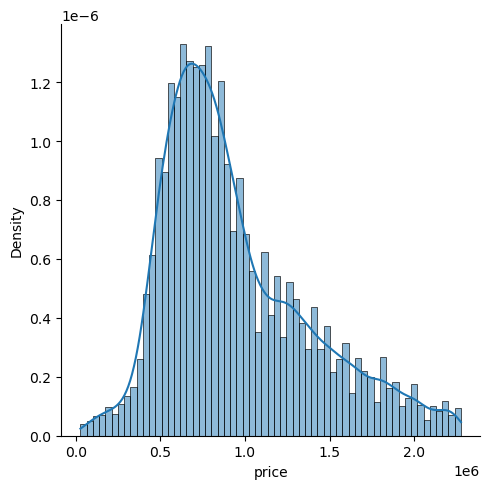

In [18]:
sns.displot(kc['price'], stat="density", kde=True)

In [19]:
'''
This still has a skew but not as much - do I need to do anything about it?
'''

'\nThis still has a skew but not as much - do I need to do anything about it?\n'

In [20]:
kc.shape

(30155, 24)

In [21]:
kc.isna().sum()

date                0
price            1994
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
greenbelt           0
nuisance            0
view                0
condition           0
grade               0
heat_source        32
sewer_system       14
sqft_above          0
sqft_basement       0
sqft_garage         0
sqft_patio          0
yr_built            0
yr_renovated        0
address             0
lat                 0
long                0
dtype: int64

In [22]:
kc.dropna(inplace=True)

In [23]:
kc.isna().any()

date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
greenbelt        False
nuisance         False
view             False
condition        False
grade            False
heat_source      False
sewer_system     False
sqft_above       False
sqft_basement    False
sqft_garage      False
sqft_patio       False
yr_built         False
yr_renovated     False
address          False
lat              False
long             False
dtype: bool

In [25]:
## what is test train split? I saw a video using this. should i use it here?

In [26]:
X_ind = kc.loc[:, kc.columns != 'price']

In [32]:
## why didn't I get just the price column when I ran this?

y_dep = kc.iloc[1]

In [34]:
X_corr = X_ind.corr()
X_corr

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
bedrooms,1.000000,0.557618,0.645403,0.002335,0.116793,0.529318,0.215977,0.295623,0.137793,0.126421,0.000561,0.107142,-0.109424
bathrooms,0.557618,1.000000,0.722441,0.022277,0.396196,0.601982,0.206635,0.421672,0.264457,0.458517,0.020221,-0.024517,0.029681
sqft_living,0.645403,0.722441,1.000000,0.115618,0.284965,0.855908,0.276017,0.480235,0.331537,0.294767,0.014095,0.101865,-0.095888
sqft_lot,0.002335,0.022277,0.115618,1.000000,-0.041789,0.124770,-0.002696,0.079095,0.158456,-0.005241,0.014152,0.031068,-0.036764
floors,0.116793,0.396196,0.284965,-0.041789,1.000000,0.447709,-0.285742,0.110660,0.110476,0.558364,-0.032536,-0.232737,0.244973
sqft_above,0.529318,0.601982,0.855908,0.124770,0.447709,1.000000,-0.174731,0.531599,0.247263,0.398431,-0.007520,0.088414,-0.088857
sqft_basement,0.215977,0.206635,0.276017,-0.002696,-0.285742,-0.174731,1.000000,-0.017457,0.160636,-0.261110,0.037035,0.058618,-0.043849
sqft_garage,0.295623,0.421672,0.480235,0.079095,0.110660,0.531599,-0.017457,1.000000,0.172350,0.439144,-0.108990,0.088129,-0.097109
sqft_patio,0.137793,0.264457,0.331537,0.158456,0.110476,0.247263,0.160636,0.172350,1.000000,0.123701,0.044037,-0.033257,0.035653
yr_built,0.126421,0.458517,0.294767,-0.005241,0.558364,0.398431,-0.261110,0.439144,0.123701,1.000000,-0.233849,-0.217982,0.217097


In [36]:
abs(X_corr) > 0.5

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
bedrooms,True,True,True,False,False,True,False,False,False,False,False,False,False
bathrooms,True,True,True,False,False,True,False,False,False,False,False,False,False
sqft_living,True,True,True,False,False,True,False,False,False,False,False,False,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,True,False,False,False
sqft_above,True,True,True,False,False,True,False,True,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,True,False,False,False,False,False,False
sqft_garage,False,False,False,False,False,True,False,True,False,False,False,False,False
sqft_patio,False,False,False,False,False,False,False,False,True,False,False,False,False
yr_built,False,False,False,False,True,False,False,False,False,True,False,False,False


I'll ignore latitude and longitude in this, but now I can easily tell which columns have a positive correlation higher than 0.5

<AxesSubplot:>

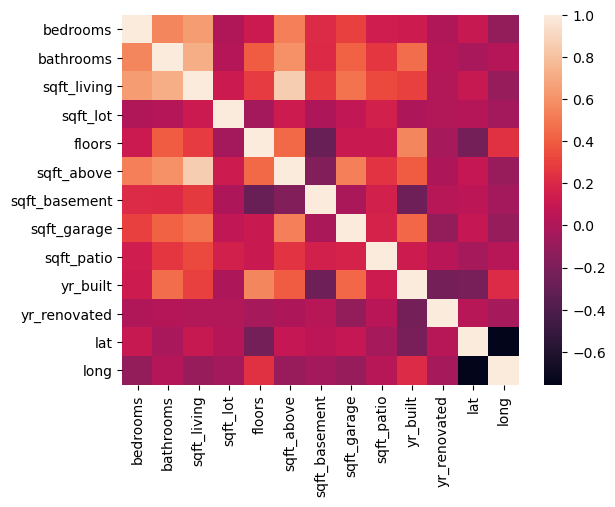

In [37]:
sns.heatmap(X_corr)

In [42]:
# below probably isn't necessary

def correlation(kc, threshold):
    #calling set instead of list or table to get only unique values
    correlated_cols = set()
    corr_matrix = kc.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range (i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                correlated_cols.add(colname)
    return correlated_cols

In [46]:
correlation(X_ind, 0.8)

{'sqft_above'}

In [60]:
## Here, the threshold says that if two variables have 70% correlation, we want to choose one variable an discard the other

In [61]:
'''
Morgan said I could try 'feature engineering' and put lat and long into a scatter plot to find the wealthier areas,
but how would I include that in my model? That seems more like data analysis, and I thought we didn't want to see 
that in this project?

can also use color parameter/heat map

2d scatter plot that has 3d color scale(cmap is color scheme and c is color dimension)
'''

"\nMorgan said I could try 'feature engineering' and put lat and long into a scatter plot to find the wealthier areas,\nbut how would I include that in my model? That seems more like data analysis, and I thought we didn't want to see \nthat in this project?\n\ncan also use color parameter/heat map\n\n2d scatter plot that has 3d color scale(cmap is color scheme and c is color dimension)\n"

In [62]:
## pair plot and heat map is helpful

In [63]:
# First, finding the most highly correlated columns to price

kc.corr()["price"]

price            1.000000
bedrooms         0.316282
bathrooms        0.433880
sqft_living      0.564844
sqft_lot         0.077405
floors           0.195117
sqft_above       0.479194
sqft_basement    0.205531
sqft_garage      0.238316
sqft_patio       0.245878
yr_built         0.075614
yr_renovated     0.055710
lat              0.086350
long            -0.030871
Name: price, dtype: float64

 Now that I know the correlations to price of numerical features, below I'll be doing some data exploration, finding columns that will be useful for the model, and dropping columns that won't be.

In [64]:
kc.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
id,,,,,,,,,,,,,,,,,,,,,
7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [65]:
# Creating a new variable which copies the predictors from the kc dataframe

data_pred = kc.iloc[:, 3:25]

In [66]:
# Looking at the dataframe to see what columns are in it and if I got all of them

#data_pred.head()

**Checking for Multicollinearity**

In [68]:
# Utilzing .stack to get returned a list that will return multicollinear relationships

df2=data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns
df2['pairs'] = list(zip(df2.level_0, df2.level_1))

# set index to new pairs column
df2.set_index(['pairs'], inplace = True)

#drop level columns that were created originally by default
df2.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column
df2.columns = ['cc']

# drop duplicates in case any were created in this process
df2.drop_duplicates(inplace=True)

In [69]:
# Running below code to return the pairs that have a greater correlation than .55 and less than 1

df2[(df2.cc>.55) & (df2.cc <1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.855908
"(long, lat)",0.756660
"(sqft_living, bathrooms)",0.722441
"(bathrooms, sqft_above)",0.601982
"(floors, yr_built)",0.558364


Now that I have a better idea of which columns have multicollinear relationships, I am going to drop some of the columns like `sqft_above`, and `yr_built` from my `kc` and my `df2` dataframe. I'm going to keep `long`, `lat` and `bathrooms` columns because I am aware that they might still be columns I want to keep.

In [74]:
kc.drop(columns = ['sqft_above', 'yr_built'], inplace=True)

In [75]:
kc.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,grade,heat_source,sewer_system,sqft_basement,sqft_garage,sqft_patio,yr_renovated,address,lat,long
id,,,,,,,,,,,,,,,,,,,,,
7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,7 Average,Gas,PUBLIC,0,0,40,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,7 Average,Oil,PUBLIC,1570,0,240,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,7 Average,Gas,PUBLIC,1580,0,0,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,9 Better,Gas,PUBLIC,1070,200,270,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,7 Average,Electricity,PUBLIC,550,550,30,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


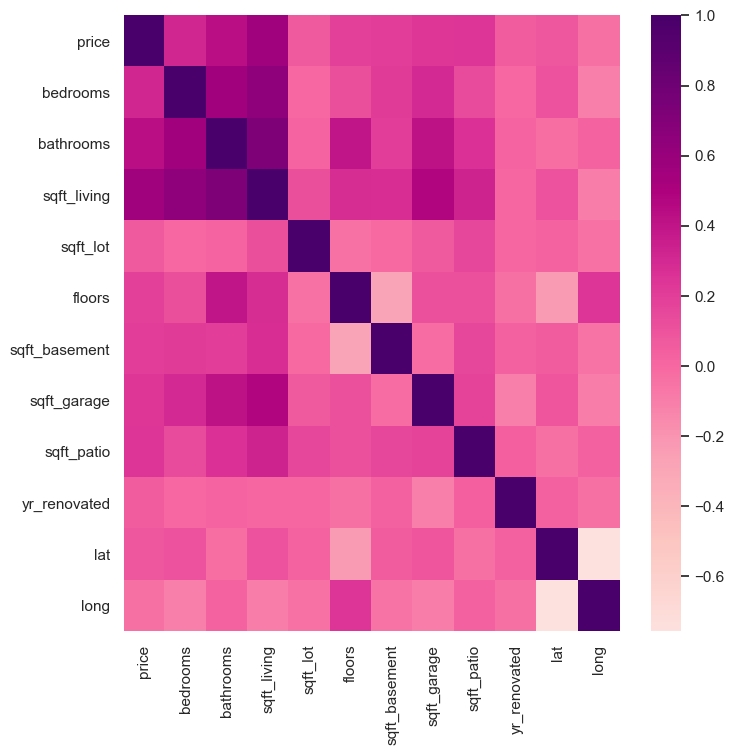

In [77]:
sns.set(rc = {'figure.figsize':(8, 8)})
sns.heatmap(kc.corr(), center=0, cmap='RdPu');

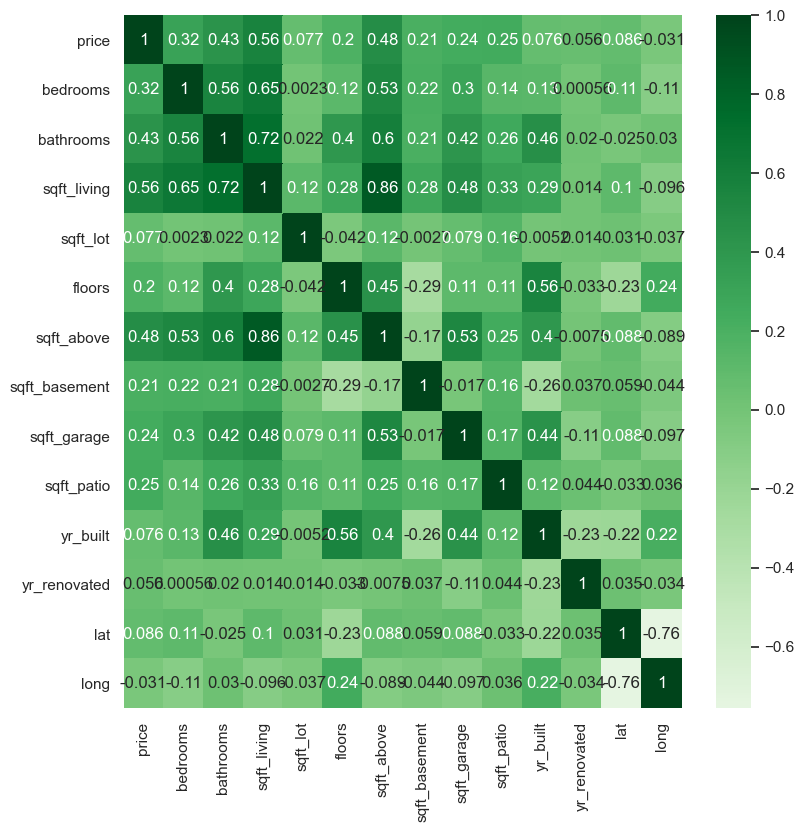

In [48]:
sns.set(rc = {'figure.figsize':(9,9)})
sns.heatmap(kc.corr(), center=0, annot=True, cmap='Greens');

In [ ]:
kc.sample(2000, random_state=1).plot.scatter(x='sqft_living', y="price", figsize=(4,3), fontsize=10, color='purple')b

NameError: name 'sqft_living' is not defined

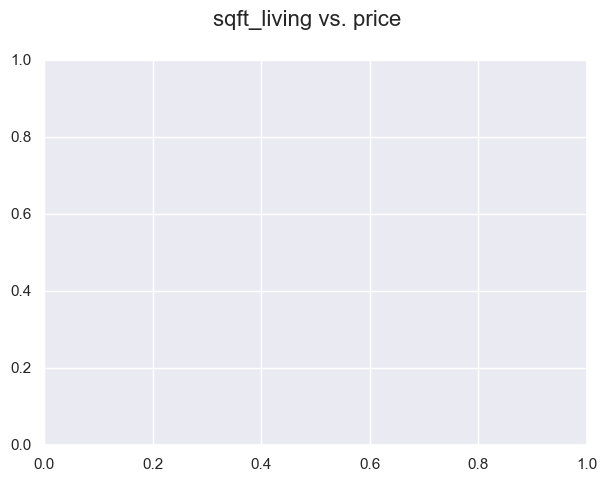

In [46]:
#use below for price vs sqft_living scatter plot with regression line

# plot data and y = 0.1x regression line
fig, ax = plt.subplots(figsize=(7, 5))
fig.suptitle('sqft_living vs. price', fontsize=16)
ax.scatter(kc['sqft_living'], price)
ax.plot(sqft_living, sqft_living/10, c='black')
ax.set_xlabel('sqft_living', fontsize=14)
ax.set_ylabel('sell price', fontsize=14);

In [49]:
'''#use below to plot original against price vs log transformed version

import numpy as np
candidates = ["LotFrontage", "GrLivArea", "YearRemodAdd"]

fig, axes = plt.subplots(ncols=2, nrows=len(candidates), figsize=(8,10))

for i, column in enumerate(candidates):
    left_ax = axes[i][0]
    left_ax.scatter(ames[column], y, alpha=0.5)
    left_ax.set_xlabel(column)
    left_ax.set_ylabel("SalePrice")
    
    # Plot log transformed version
    right_ax = axes[i][1]
    right_ax.scatter(np.log(ames[column]), np.log(y), alpha=0.5)
    right_ax.set_xlabel(f"log({column})")
    right_ax.set_ylabel("log(SalePrice)")
    
fig.suptitle("Raw vs. Log Transformed")

fig.tight_layout()
'''

'#use below to plot original against price vs log transformed version\n\nimport numpy as np\ncandidates = ["LotFrontage", "GrLivArea", "YearRemodAdd"]\n\nfig, axes = plt.subplots(ncols=2, nrows=len(candidates), figsize=(8,10))\n\nfor i, column in enumerate(candidates):\n    left_ax = axes[i][0]\n    left_ax.scatter(ames[column], y, alpha=0.5)\n    left_ax.set_xlabel(column)\n    left_ax.set_ylabel("SalePrice")\n    \n    # Plot log transformed version\n    right_ax = axes[i][1]\n    right_ax.scatter(np.log(ames[column]), np.log(y), alpha=0.5)\n    right_ax.set_xlabel(f"log({column})")\n    right_ax.set_ylabel("log(SalePrice)")\n    \nfig.suptitle("Raw vs. Log Transformed")\n\nfig.tight_layout()\n'

In [50]:
# Looking at categorical features and their value counts to determine which ones represent the dataset well

In [51]:
categorical_features = kc.select_dtypes("object").columns
print(categorical_features)

Index(['date', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition',
       'grade', 'heat_source', 'sewer_system', 'address'],
      dtype='object')


In [52]:
kc['waterfront'].value_counts()

NO     27797
YES      324
Name: waterfront, dtype: int64

In [53]:
'''
My old instructor had said to not use waterfront homes etc if the majority of homes aren't represented by it,
should I do that?
'''

"\nMy old instructor had said to not use waterfront homes etc if the majority of homes aren't represented by it,\nshould I do that?\n"

With only 1.75% of homes being Waterfront, I'm not sure that I'm going to use this in my regression model because it won't describe the change in price for a large majority of homes.

<AxesSubplot:xlabel='waterfront'>

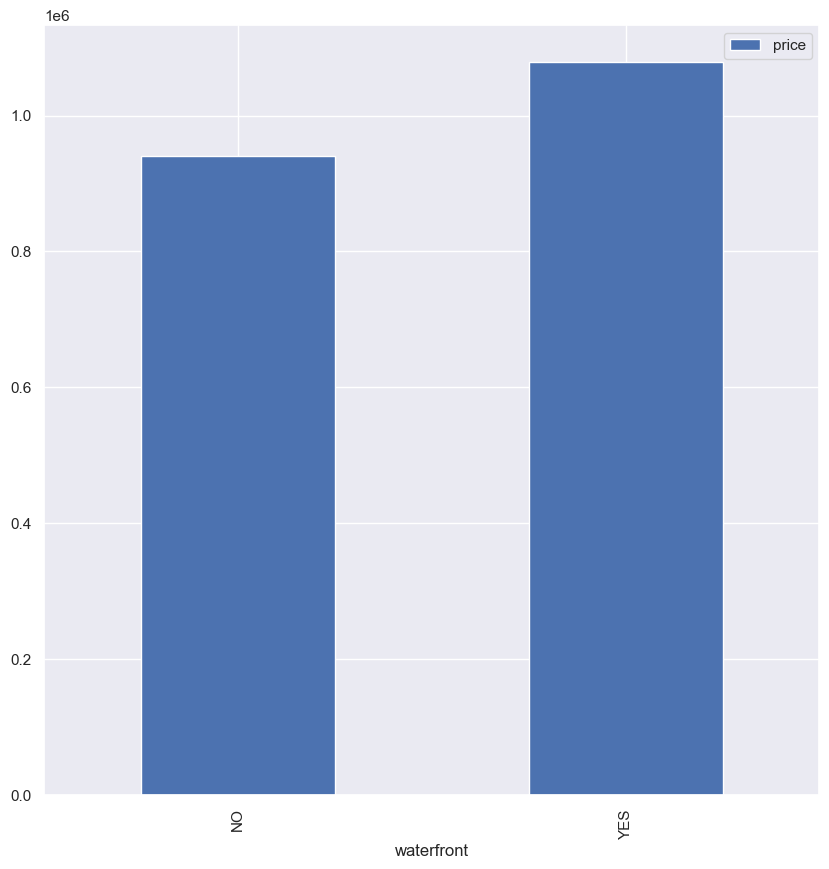

In [54]:
kc.groupby('waterfront').mean().plot.bar(y="price")

In [55]:
kc['heat_source'].value_counts()

Gas                  18889
Electricity           6255
Oil                   2822
Gas/Solar               76
Electricity/Solar       57
Other                   18
Oil/Solar                4
Name: heat_source, dtype: int64

Most homes use gas as a heating source, followed by electricity and then oil, so that might not be a good predictor either.

<AxesSubplot:xlabel='heat_source'>

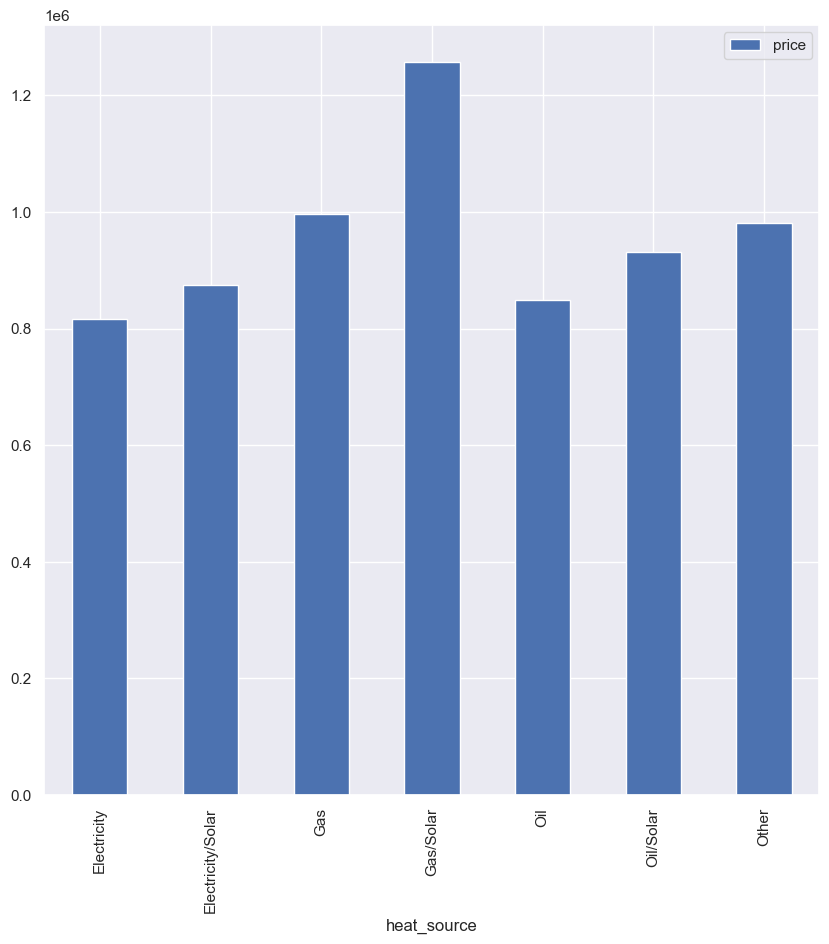

In [56]:
kc.groupby('heat_source').mean().plot.bar(y="price")

It looks like homes that have gas/solar as a heating source have the highest sell price, but taking into account that there are only 93 homes that are gas/solar, it might not be the best feature to include.

In [57]:
kc['condition'].value_counts()

Average      17135
Good          7654
Very Good     3054
Fair           218
Poor            60
Name: condition, dtype: int64

Above, `condition` might be a good indicator with price, but we will have to do more exploring to fnd out.

<AxesSubplot:xlabel='condition'>

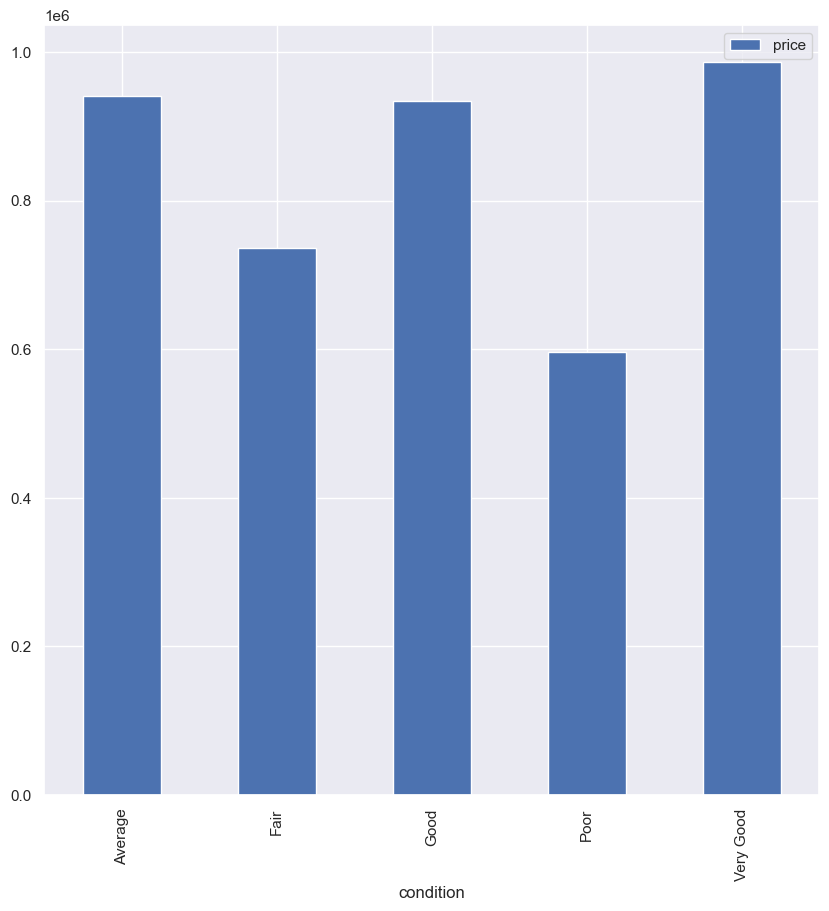

In [58]:
kc.groupby('condition').mean().plot.bar(y="price")

Based on this graph, it appears to be that the data is presenting as expected. Homes that are considered *average*, *good* or *very good* have a higher sale price than those that are in *fair* or *poor* condition. However, *very good* still doesn't appear to have a much higher sell price than *average*.

In [59]:
kc['greenbelt'].value_counts()

NO     27453
YES      668
Name: greenbelt, dtype: int64

<AxesSubplot:xlabel='greenbelt'>

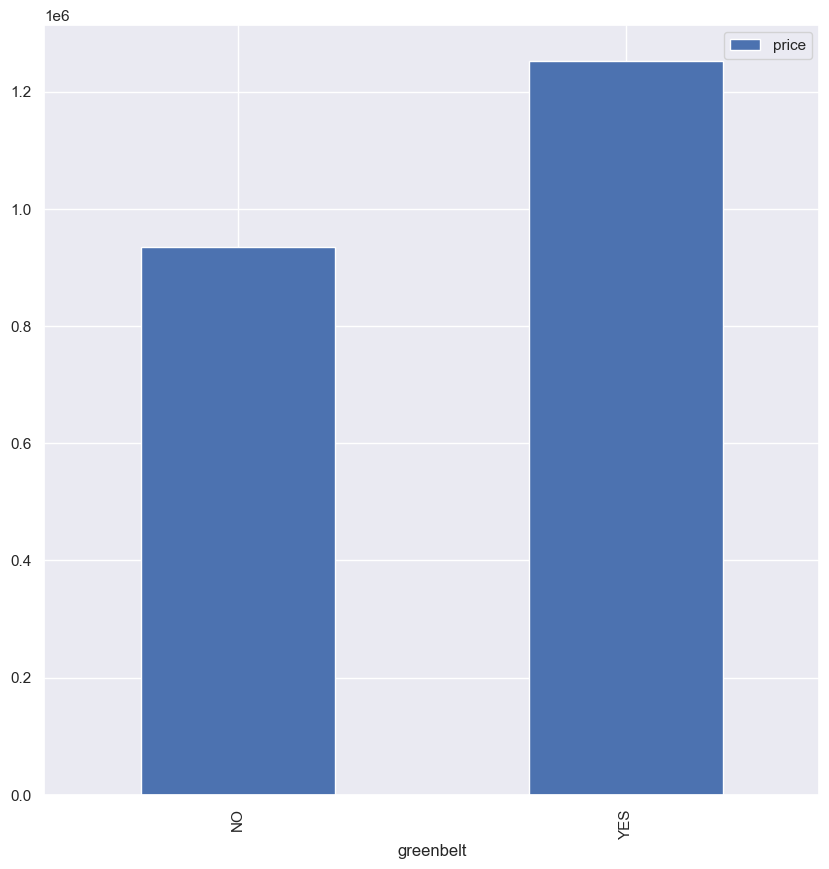

In [60]:
kc.groupby('greenbelt').mean().plot.bar(y="price")

A greenbelt is an area in a city where building is restricted. It might be a park or land under conservation. There aren't many homes that are near a greenbelt, so this also won't do a great job at explaining our data, but it does appear that homes which are near a greenbelt sell for at least $200,000 more. 

In [61]:
kc['nuisance'].value_counts()

NO     23251
YES     4870
Name: nuisance, dtype: int64

<AxesSubplot:xlabel='nuisance'>

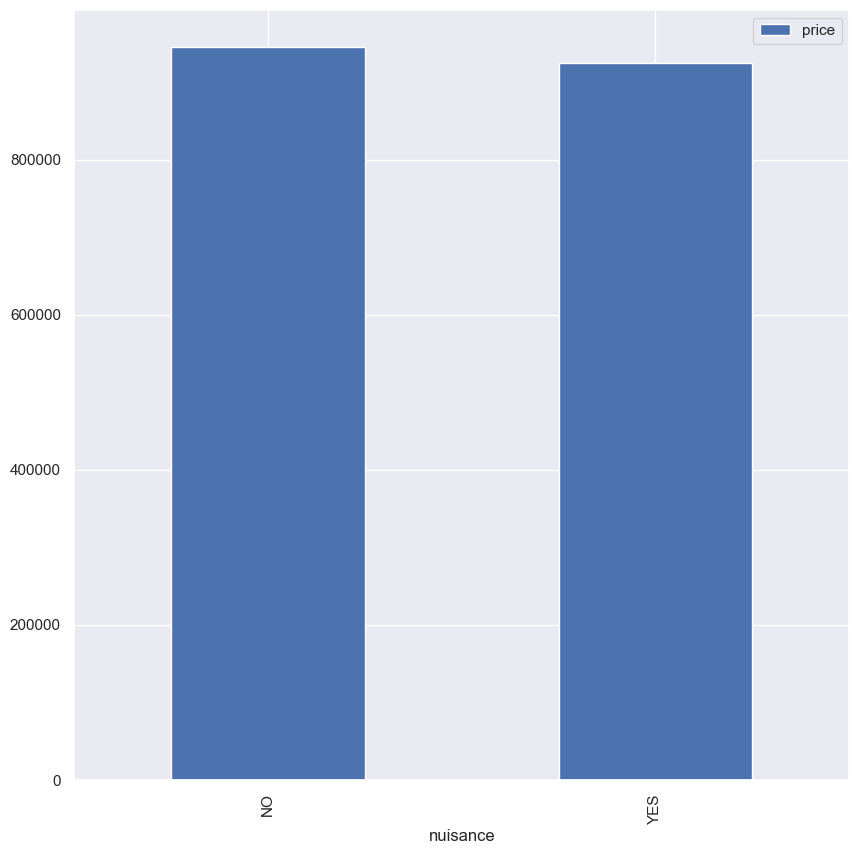

In [62]:
kc.groupby('nuisance').mean().plot.bar(y="price")

In the definitions, a nuisance is explained as whether or not a home has a lot of traffic noise or other nuisances that can impact someone's tranquility in their home. This would be something that you would think decreases a home's value, but based on the graph above, it doesn't appear to do so. That might be because homes which have noises from traffic also might be closer to highways or in busier, more expensive areas.

In [63]:
kc['view'].value_counts()

NONE         25325
AVERAGE       1665
GOOD           680
EXCELLENT      276
FAIR           175
Name: view, dtype: int64

Apparently, most homes don't have a view, so it's unlikely that this will be included in the model.

In [64]:
kc['grade'].value_counts()

7 Average        11613
8 Good            9164
9 Better          3224
6 Low Average     2822
10 Very Good       748
5 Fair             380
11 Excellent       104
4 Low               45
12 Luxury           10
3 Poor               9
2 Substandard        1
13 Mansion           1
Name: grade, dtype: int64

<AxesSubplot:xlabel='grade'>

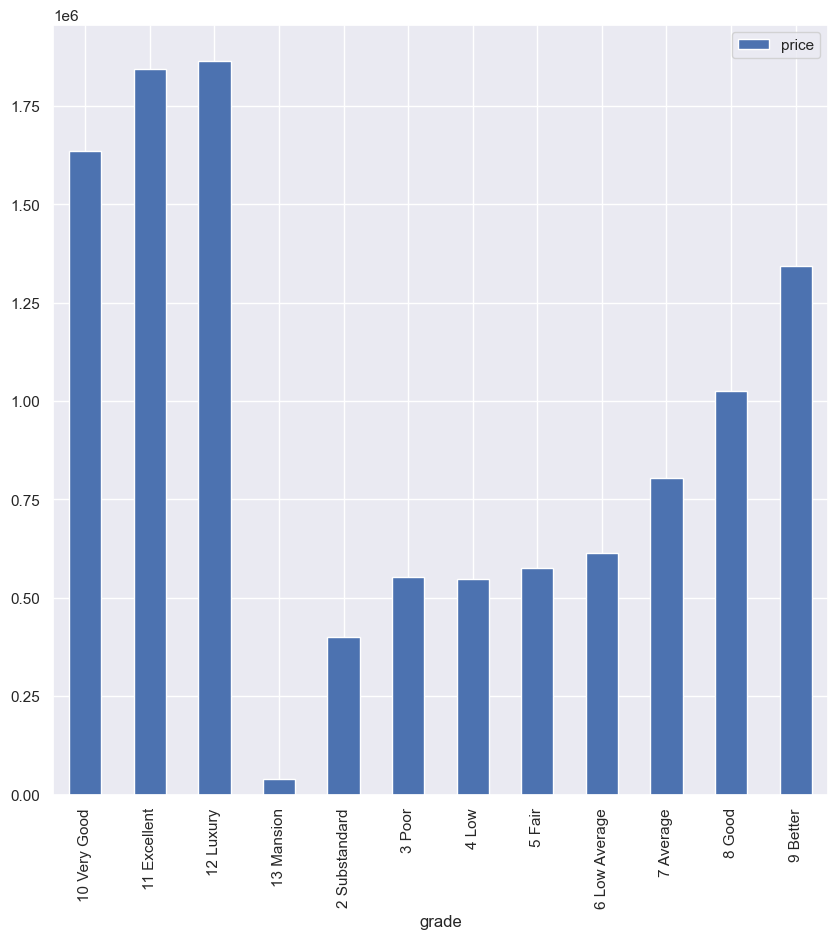

In [65]:
kc.groupby('grade').mean().plot.bar(y="price")

In [67]:
'''
Having trouble understanding how I can incorporate grade/condition into the model if the model doesn't necessarily
know which is better. how can I sort these manually? 
'''

"\nHaving trouble understanding how I can incorporate grade/condition into the model if the model doesn't necessarily\nknow which is better. how can I sort these manually? \n"

This might be a good feature that helps determine what types of homes will sell for more money, and shows that it's important to have a very good home if you don't have a mansion, becuase the sell price is sill higher than *good* or *better*

In [68]:
kc['sewer_system'].value_counts()

PUBLIC                24028
PRIVATE                4085
PRIVATE RESTRICTED        5
PUBLIC RESTRICTED         3
Name: sewer_system, dtype: int64

More exploratory analysis will need to be done to determine if private vs public sewer system makes a big difference, but based on previous knowledge I don't think it will have a big impact.

The last categorical feature in the DataFrame is address, and although areas and neighborhoods can greatly increase or decrease a house's selling price, for the sake of time I won't be looking that in my model. 

In [69]:
# Deleting some columns that I know I won't be using in my model

##kc.drop(['address', 'waterfront', 'view', 'date', 'lat', 'long'], axis=1)

In [70]:
'''
How can I use latitude and longitude to find the more expensive areas? 
'''

'\nHow can I use latitude and longitude to find the more expensive areas? \n'

In [71]:
# Checking for duplicate values and keeping first occurrences in the DataFrame

kc.duplicated(keep='first').sum()

3

In [72]:
# Checking the new size of the DataFrame

kc.shape

(28121, 19)

In [73]:
# Getting some statistics for the DataFrame so I know averages, standard deviations, and quantiles

kc.describe()

,price,bedrooms,bathrooms,sqft_living,floors,sqft_garage,sqft_patio,lat,long
count,2.812100e+04,28121.000000,28121.000000,28121.000000,28121.000000,28121.000000,28121.000000,28121.000000,28121.000000
mean,9.420307e+05,3.359873,2.248640,1988.831585,1.523754,314.703887,202.342947,47.314627,-121.296437
std,4.347674e+05,0.952762,0.796831,798.991271,0.567293,272.243119,226.843948,1.455630,5.797357
min,2.736000e+04,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,21.274240,-157.791480
25%,6.300000e+05,3.000000,2.000000,1390.000000,1.000000,0.000000,40.000000,47.390145,-122.329325
50%,8.299950e+05,3.000000,2.500000,1860.000000,1.500000,380.000000,140.000000,47.541830,-122.233860
75%,1.199950e+06,4.000000,2.500000,2460.000000,2.000000,500.000000,300.000000,47.670530,-122.116360
max,2.276500e+06,11.000000,7.500000,8020.000000,4.000000,3580.000000,4370.000000,64.824070,-70.074340


Taking a look at some of the means of these columns, the homes from King's County in this DataFrame have 3 bedrooms
and 2 bathrooms on average. Technically there are more, which is impossible for bedrooms, but homes do have "half
baths." Also, the maximum has 13 bedroms and 10.5 bathrooms! If you scroll over, there is also latitude and longitude which won't be as useful for my analyis.

In [115]:
'''
work it out to price per square foot or at least divide price so it's on the same scale
'''

"\nwork it out to price per square foot or at least divide price so it's on the same scale\n"

### Building a Baseline Simple Linear Regression Model

Building a baseline is important because it is what I will compare the model reiterations to. The goal will to get a better R-squared, so I know that the models are getting more and more accurate.

In [74]:
# Finding the most correlated column to price

kc.corr()["price"]

price          1.000000
bedrooms       0.316282
bathrooms      0.433880
sqft_living    0.564844
floors         0.195117
sqft_garage    0.238316
sqft_patio     0.245878
lat            0.086350
long          -0.030871
Name: price, dtype: float64

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

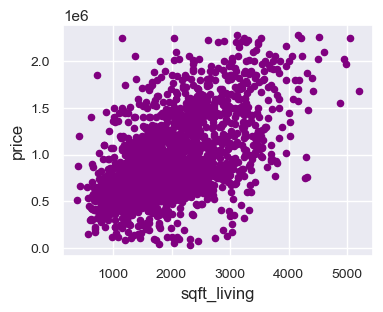

In [76]:
# Plotting a sample to show the most correlated vs. price

kc.sample(2000, random_state=1).plot.scatter(x='sqft_living', y="price", figsize=(4,3), fontsize=10, color='purple')
## create fitted line sns.regplot

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

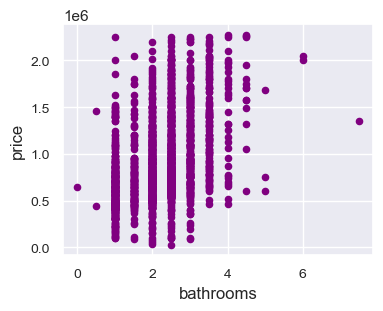

In [78]:
kc.sample(2000, random_state=1).plot.scatter(x='bathrooms', y="price", figsize=(4,3), fontsize=10, color='purple')

**Setting up Variables for Regression**

In [79]:
# Creating variables to perform regression analysis

y = kc["price"]
X_baseline = kc[['sqft_living']]

In [80]:
# Creating a simple linear regression

baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

In [81]:
# Printing results of the model to evaluate model performance

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                 1.317e+04
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:35:50   Log-Likelihood:            -3.9958e+05
No. Observations:               28121   AIC:                         7.992e+05
Df Residuals:                   28119   BIC:                         7.992e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.307e+05   5739.310     57.629      

Since *R-squared* is 0.370, I know that this model based solely on `sqft_living` impacting price is not doing a great job of explaining changes in price. That being said, I would like to at least get my R-squared to 0.700. 

In [82]:
'''

From Mark: talk about overfitting/underfitting/multicollinearity in the notebook

if final model isn't ideal with metrics (0.55) be able to speak to it
'''

"\n\nFrom Mark: talk about overfitting/underfitting/multicollinearity in the notebook\n\nif final model isn't ideal with metrics (0.55) be able to speak to it\n"

In [83]:
# Finding mean absolute error to find the average error for this model and measure how effective it is

from sklearn.metrics import mean_absolute_error

baseline_mae = mean_absolute_error(y, baseline_results.predict(sm.add_constant(X_baseline)))
baseline_mae

279716.2268189993

### Label Encoding Categorical Columns

In [84]:
labelencoder = LabelEncoder()

In [85]:
condition_map = {
    'Poor': 0,
    'Fair': 1,
    'Average': 2,
    'Good': 3,
    'Very Good': 4,
}

In [86]:
kc['condition'].map(condition_map)

id
7399300360    3
8910500230    2
1180000275    2
1604601802    2
8562780790    2
             ..
7834800180    3
194000695     2
7960100080    2
2781280080    2
9557800100    2
Name: condition, Length: 28121, dtype: int64

In [87]:
kc['condition'] = kc['condition'].map(condition_map)

In [88]:
kc['condition']

id
7399300360    3
8910500230    2
1180000275    2
1604601802    2
8562780790    2
             ..
7834800180    3
194000695     2
7960100080    2
2781280080    2
9557800100    2
Name: condition, Length: 28121, dtype: int64

Write that I attempted to use labelencoder but I found that it wasn't in order so I just created a dictionary since there weren't that many values

In [89]:
# Assigning numerical values and storing in another column

kc['condition_encoded'] = labelencoder.fit_transform(kc['condition'])
kc[['condition', 'condition_encoded']]

,condition,condition_encoded
id,,
7399300360,3,3
8910500230,2,2
1180000275,2,2
1604601802,2,2
8562780790,2,2
...,...,...
7834800180,3,3
194000695,2,2
7960100080,2,2


In [90]:
kc['condition_encoded'].value_counts()

2    17135
3     7654
4     3054
1      218
0       60
Name: condition_encoded, dtype: int64

In [91]:
kc['condition'].value_counts()

2    17135
3     7654
4     3054
1      218
0       60
Name: condition, dtype: int64

In [92]:
kc['grade_encoded'] = labelencoder.fit_transform(kc['grade'])
kc[['grade', 'grade_encoded']]

,grade,grade_encoded
id,,
7399300360,7 Average,9
8910500230,7 Average,9
1180000275,7 Average,9
1604601802,9 Better,11
8562780790,7 Average,9
...,...,...
7834800180,8 Good,10
194000695,7 Average,9
7960100080,7 Average,9


In [93]:
kc['grade_encoded'].value_counts()

9     11613
10     9164
11     3224
8      2822
0       748
7       380
1       104
6        45
2        10
5         9
4         1
3         1
Name: grade_encoded, dtype: int64

In [94]:
kc['grade'].value_counts()

7 Average        11613
8 Good            9164
9 Better          3224
6 Low Average     2822
10 Very Good       748
5 Fair             380
11 Excellent       104
4 Low               45
12 Luxury           10
3 Poor               9
2 Substandard        1
13 Mansion           1
Name: grade, dtype: int64

In [95]:
y = kc["price"]
X_secondmodel = kc[['sqft_living', 'condition']]

In [96]:
second_model = sm.OLS(y, sm.add_constant(X_secondmodel))
second_results = second_model.fit()

In [97]:
second_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     6699.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:37:05   Log-Likelihood:            -3.9950e+05
No. Observations:               28121   AIC:                         7.990e+05
Df Residuals:                   28118   BIC:                         7.990e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.348e+05   9642.270     24.347      0.000    2.16e+05    2.54e+05
sqft_living   308.8426      2.673    115.530      0.000     303.603     314.082
condition    3.755e+04   3035.800     12.370      0.000    3.16e+04    4.35e+04
==============================================================================
Omnibus:                     1450.944   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1834.935
Skew:                           0.522   Prob(JB):                         0.00
Kurtosis:                       3.690   Cond. No.                     1.00e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This didn't seem to increase my R-squared by much, so I'm also going to include the number of bathrooms in my model.

In [101]:
y=kc["price"]
X_thirdmodel = kc[['sqft_living', 'condition_encoded', 'grade_encoded', 'bathrooms']]

In [102]:
thirdmodel = sm.OLS(y, sm.add_constant(X_thirdmodel))
third_results = thirdmodel.fit()

In [103]:
third_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     3379.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:37:48   Log-Likelihood:            -3.9947e+05
No. Observations:               28121   AIC:                         7.989e+05
Df Residuals:                   28116   BIC:                         7.990e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.503e+05   1.48e+04     16.909      0.000    2.21e+05    2.79e+05
sqft_living         284.4757      3.892     73.085      0.000     276.846     292.105
condition_encoded  3.801e+04   3033.920     12.529      0.000    3.21e+04     4.4e+04
grade_encoded     -4699.1529   1178.778     -3.986      0.000   -7009.614   -2388.691
bathrooms          3.325e+04   3911.350      8.501      0.000    2.56e+04    4.09e+04
==============================================================================
Omnibus:                     1485.220   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1890.318
Skew:                           0.528   Prob(JB):                         0.00
Kurtosis:                       3.706   Cond. No.                     1.50e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [106]:
y=kc["price"]
X_fourthmodel = kc[['sqft_living', 'condition_encoded', 'bathrooms', 'bedrooms', 'grade_encoded']]
fourthmodel = sm.OLS(y, sm.add_constant(X_fourthmodel))
fourth_results = fourthmodel.fit()

In [107]:
fourth_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     2776.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:38:15   Log-Likelihood:            -3.9934e+05
No. Observations:               28121   AIC:                         7.987e+05
Df Residuals:                   28115   BIC:                         7.987e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3.006e+05   1.51e+04     19.929      0.000    2.71e+05     3.3e+05
sqft_living         313.4827      4.295     72.982      0.000     305.064     321.902
condition_encoded  4.318e+04   3038.809     14.211      0.000    3.72e+04    4.91e+04
bathrooms          4.342e+04   3948.258     10.998      0.000    3.57e+04    5.12e+04
bedrooms          -4.677e+04   2986.293    -15.663      0.000   -5.26e+04   -4.09e+04
grade_encoded     -3228.2473   1177.440     -2.742      0.006   -5536.087    -920.408
==============================================================================
Omnibus:                     1532.293   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1995.970
Skew:                           0.530   Prob(JB):                         0.00
Kurtosis:                       3.762   Cond. No.                     1.54e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Preparing a Categorical Feature for Multiple Regression Modeling

In [81]:
categorical_features = df.select_dtypes("object").columns

In [82]:
print(categorical_features)

Index(['date', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition',
       'grade', 'heat_source', 'sewer_system', 'address'],
      dtype='object')


In [83]:
df['heat_source'].value_counts()

Gas                  20583
Electricity           6465
Oil                   2899
Gas/Solar               93
Electricity/Solar       59
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64

In [84]:
kc_catsubset = kc[['waterfront', 'heat_source', 'condition', 'sewer_system']].copy()

In [86]:
'''
log transform can be used when there is a lot of skew, run a model before and after log transforming to see the 
difference

to avoid data leakage want to do train test split before any transforms
'''

'\nlog transform can be used when there is a lot of skew, run a model before and after log transforming to see the \ndifference\n\nto avoid data leakage want to do train test split before any transforms\n'